In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.nonparametric.api as smnp
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Rectangle

In [2]:
react=pd.read_table('react_raw.csv', index_col=False)
# react.set_index('sub', inplace=True)

In [3]:
react=react[react['cond']==1]
react.drop('cond', axis=1, inplace=True)
react['zero']=0

In [4]:
def distance(array, x1, y1, x2, y2, new_col):
    dx=array[x2]-array[x1]
    dy=array[y2]-array[y1]
    array[new_col]=np.sqrt(dx**2+dy**2)
    return array

In [5]:
distance(react, 'x', 'y', 'x1', 'y1', 't1_orig_dist')
distance(react, 'x', 'y', 'x2', 'y2', 't2_orig_dist')
distance(react, 'x1', 'y1', 'x2', 'y2', 't2_t1_dist')
distance(react, 'x', 'y', 'x3', 'y3', 't3_orig_dist')
distance(react, 'x2', 'y2', 'x3', 'y3', 't3_t2_dist')

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,t3_rt,t1_order,t2_order,t3_order,zero,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t2_dist
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,3760,145,6,2,0,7.071068,44.821870,49.929951,34.014703,27.018512
1,401,258,-104,250,-87,239,-78,255,-82,580,...,460,90,25,159,0,18.788294,32.202484,14.212670,22.203603,16.492423
2,401,-236,265,-237,288,-248,301,-243,298,440,...,540,48,102,35,0,23.021729,37.947332,17.029386,33.734256,5.830952
3,401,-123,200,-126,225,-116,182,-141,212,440,...,560,127,33,107,0,25.179357,19.313208,44.147480,21.633308,39.051248
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,1400,54,103,13,0,34.525353,421.099751,388.958867,172.029067,251.962299
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,1340,176,45,22,0,36.674242,184.894565,180.269243,39.051248,181.804840
6,401,-225,142,-186,128,-116,221,132,221,340,...,760,85,58,27,0,41.436699,134.617978,116.400172,365.636431,248.000000
7,401,133,93,176,71,241,82,240,85,320,...,620,7,19,8,0,48.301139,108.558740,65.924199,107.298649,3.162278
8,401,163,180,142,135,165,137,148,117,400,...,500,140,66,108,0,49.658836,43.046487,23.086793,64.761099,26.248809
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,380,15,15,51,0,54.918121,104.350371,71.196910,115.108644,15.132746


In [6]:
distance(react, 'x', 'y', 'zero', 'zero', 'orig_center_dist')
distance(react, 'x1', 'y1', 'zero', 'zero', 't1_center_dist')
distance(react, 'x2', 'y2', 'zero', 'zero', 't2_center_dist')
distance(react, 'x3', 'y3', 'zero', 'zero', 't3_center_dist')

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,zero,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,0,7.071068,44.821870,49.929951,34.014703,27.018512,198.406149,205.448290,174.470628,165.801086
1,401,258,-104,250,-87,239,-78,255,-82,580,...,0,18.788294,32.202484,14.212670,22.203603,16.492423,278.172608,264.705497,251.406046,267.860038
2,401,-236,265,-237,288,-248,301,-243,298,440,...,0,23.021729,37.947332,17.029386,33.734256,5.830952,354.853491,372.978552,390.006410,384.516580
3,401,-123,200,-126,225,-116,182,-141,212,440,...,0,25.179357,19.313208,44.147480,21.633308,39.051248,234.795656,257.877878,215.824002,254.607541
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,0,34.525353,421.099751,388.958867,172.029067,251.962299,290.877981,256.425428,166.508258,153.687996
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,0,36.674242,184.894565,180.269243,39.051248,181.804840,246.805592,278.226526,252.017857,281.044480
6,401,-225,142,-186,128,-116,221,132,221,340,...,0,41.436699,134.617978,116.400172,365.636431,248.000000,266.062023,225.787511,249.593670,257.419890
7,401,133,93,176,71,241,82,240,85,320,...,0,48.301139,108.558740,65.924199,107.298649,3.162278,162.289864,189.781453,254.568262,254.607541
8,401,163,180,142,135,165,137,148,117,400,...,0,49.658836,43.046487,23.086793,64.761099,26.248809,242.835335,195.931110,214.462118,188.661072
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,0,54.918121,104.350371,71.196910,115.108644,15.132746,185.043238,239.075302,263.210942,266.046988


In [7]:
def get_quad(array, x, y, new_col):
    for sub, row in array.iterrows():
        if (array.loc[sub, x]<0) & (array.loc[sub, y]<0):
                array.loc[sub, new_col]=3
        elif (array.loc[sub, x]<0) & (array.loc[sub, y]>0):
                array.loc[sub, new_col]=2    
        elif (array.loc[sub, x]>0) & (array.loc[sub, y]<0):
                array.loc[sub, new_col]=4    
        elif (array.loc[sub, x]>0) & (array.loc[sub, y]>0):
                array.loc[sub, new_col]=1    
        else: array.loc[sub, new_col]=np.nan    
    return array

In [8]:
get_quad(react, 'x', 'y', 'loc_quad')
get_quad(react, 'x1', 'y1', 'loc1_quad')
get_quad(react, 'x2', 'y2', 'loc2_quad')
get_quad(react, 'x3', 'y3', 'loc3_quad')

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,t3_orig_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist,loc_quad,loc1_quad,loc2_quad,loc3_quad
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,34.014703,27.018512,198.406149,205.448290,174.470628,165.801086,3.0,3.0,3.0,3.0
1,401,258,-104,250,-87,239,-78,255,-82,580,...,22.203603,16.492423,278.172608,264.705497,251.406046,267.860038,4.0,4.0,4.0,4.0
2,401,-236,265,-237,288,-248,301,-243,298,440,...,33.734256,5.830952,354.853491,372.978552,390.006410,384.516580,2.0,2.0,2.0,2.0
3,401,-123,200,-126,225,-116,182,-141,212,440,...,21.633308,39.051248,234.795656,257.877878,215.824002,254.607541,2.0,2.0,2.0,2.0
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,172.029067,251.962299,290.877981,256.425428,166.508258,153.687996,3.0,3.0,2.0,3.0
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,39.051248,181.804840,246.805592,278.226526,252.017857,281.044480,3.0,3.0,3.0,3.0
6,401,-225,142,-186,128,-116,221,132,221,340,...,365.636431,248.000000,266.062023,225.787511,249.593670,257.419890,2.0,2.0,2.0,1.0
7,401,133,93,176,71,241,82,240,85,320,...,107.298649,3.162278,162.289864,189.781453,254.568262,254.607541,1.0,1.0,1.0,1.0
8,401,163,180,142,135,165,137,148,117,400,...,64.761099,26.248809,242.835335,195.931110,214.462118,188.661072,1.0,1.0,1.0,1.0
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,115.108644,15.132746,185.043238,239.075302,263.210942,266.046988,2.0,3.0,3.0,3.0


In [9]:
means=pd.DataFrame(react.groupby(['sub'])['t1_orig_dist', 't2_orig_dist', 't3_orig_dist', 't3_t2_dist'].mean())
means.reset_index(inplace=True)
means

,sub,t1_orig_dist,t2_orig_dist,t3_orig_dist,t3_t2_dist
0,401,156.956924,191.791047,188.032920,108.285758
1,402,164.226589,191.123570,205.922832,148.840465
2,403,152.453302,188.560901,206.351806,139.029322
3,404,183.216703,259.102723,260.973939,200.154791
4,405,225.121252,304.672668,291.929951,235.482037
5,406,77.256586,92.764175,106.273281,73.186137
6,407,109.002043,149.355296,163.738796,105.807416
7,408,129.197827,209.879409,226.614278,193.728012
8,409,110.787505,149.690228,161.866591,105.538951
9,410,94.335044,147.731585,140.953734,114.604932


In [10]:
cmap = plt.get_cmap('Set2')
original = cmap(5)
update =cmap(4)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


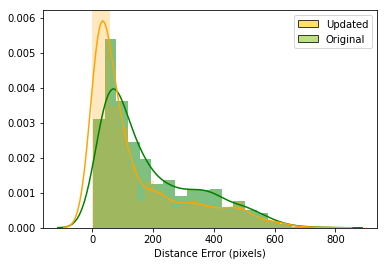

In [11]:
hist_kde=sns.distplot(react['t3_orig_dist'], color='Green', norm_hist=True, hist_kws={'alpha':.5})
hist_kde=sns.distplot(react['t3_t2_dist'], color='Orange', axlabel='Distance Error (pixels)', norm_hist=True, hist_kws={'alpha':.25})
handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=.75) for c in [original, update]]
labels= ["Updated", "Original",]
plt.legend(handles, labels)
hist_kde=hist_kde.get_figure()
hist_kde.savefig('react_hist_kde.png')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


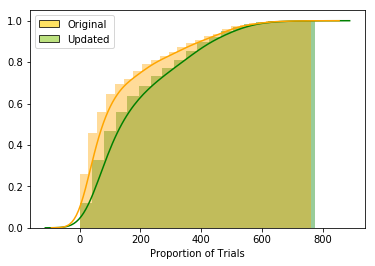

In [12]:
cum_kde=sns.distplot(react['t3_orig_dist'], color='Green',
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
cum_kde=sns.distplot(react['t3_t2_dist'], color='Orange',
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.xlabel('Distance Error (pixels)')
plt.xlabel('Proportion of Trials')
handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=.75) for c in [original, update]]
labels= ["Original","Updated"]
plt.legend(handles, labels)
cum_kde=cum_kde.get_figure()
cum_kde.savefig('react_cum_kde.png')

In [13]:
finaldist=pd.melt(react, id_vars=['x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3',
                                  't1_orig_dist', 't2_orig_dist'],
                                  value_vars=['t3_orig_dist', 't3_t2_dist'],
                  var_name='final_mem',value_name='final_dist')

Text(0,0.5,'Distance Error (pixels)')

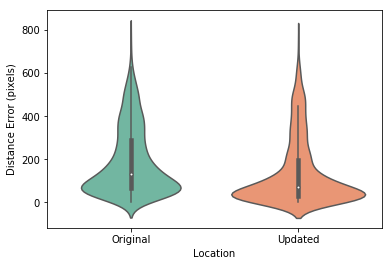

In [14]:
viosplit=sns.violinplot(x="final_mem", y="final_dist", data=finaldist, palette="Set2")
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Distance Error (pixels)')

Text(0,0.5,'Mean Distance Error (pixels)')

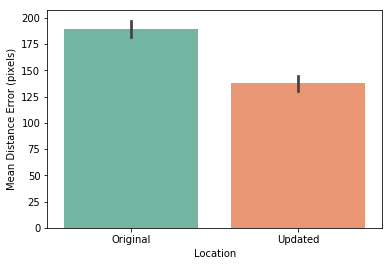

In [15]:
bar=sns.barplot(x="final_mem", y="final_dist", data=finaldist, palette="Set2")
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Mean Distance Error (pixels)')

Text(3.8,0.5,'Mean Distance Error (pixels)')

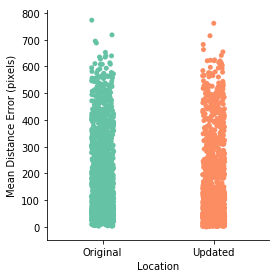

In [16]:
strip=sns.factorplot(x="final_mem", y="final_dist", 
               data=finaldist, kind="strip", jitter=True, palette='Set2');
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Mean Distance Error (pixels)')

Text(3.8,0.5,'Mean Distance Error (pixels)')

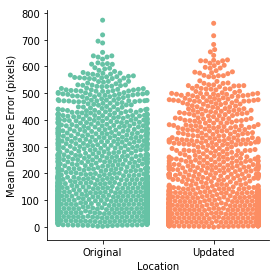

In [17]:
strip=sns.factorplot(x="final_mem", y="final_dist", 
               data=finaldist, kind="swarm", palette='Set2');
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Mean Distance Error (pixels)')

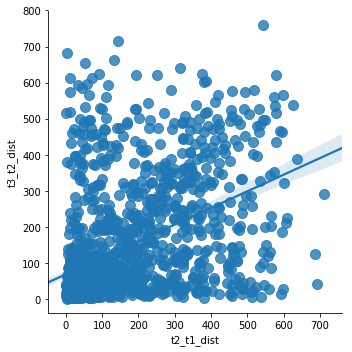

In [18]:
sns.lmplot('t2_t1_dist', # Horizontal axis
           't3_t2_dist', # Vertical axis
           data=react, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

In [19]:
corr=react.drop(['sub', 'zero','x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3'], axis=1)
corr.columns

Index(['t1_rt', 't2_rt', 't3_rt', 't1_order', 't2_order', 't3_order',
       't1_orig_dist', 't2_orig_dist', 't2_t1_dist', 't3_orig_dist',
       't3_t2_dist', 'orig_center_dist', 't1_center_dist', 't2_center_dist',
       't3_center_dist', 'loc_quad', 'loc1_quad', 'loc2_quad', 'loc3_quad'],
      dtype='object')

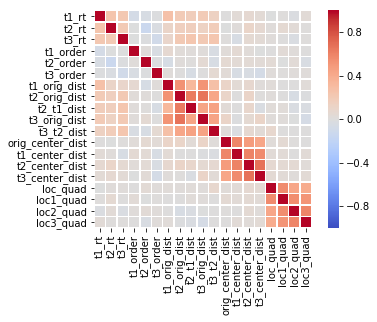

In [20]:
sns.heatmap(corr.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm',
            square=True, linewidths=.5)

In [21]:
corr.corr()

,t1_rt,t2_rt,t3_rt,t1_order,t2_order,t3_order,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist,loc_quad,loc1_quad,loc2_quad,loc3_quad
t1_rt,1.000000,0.246596,0.223389,-0.064241,-0.040033,-0.011820,0.273385,0.199046,0.176783,0.197892,0.142898,0.001988,0.035271,0.070209,0.041639,-0.004516,0.015169,-0.021147,0.036235
t2_rt,0.246596,1.000000,0.206405,-0.001982,-0.130156,-0.028267,0.109387,0.158283,0.170834,0.138857,0.182378,-0.004668,0.019962,0.101660,0.067141,0.018651,0.058061,0.031783,0.014428
t3_rt,0.223389,0.206405,1.000000,-0.007468,-0.008431,-0.091339,0.098119,0.214080,0.236332,0.213729,0.237210,0.011540,-0.044097,0.059472,0.042826,0.017947,0.000394,-0.025747,0.014208
t1_order,-0.064241,-0.001982,-0.007468,1.000000,0.020546,-0.032606,0.063730,0.026080,0.021475,0.018879,-0.033087,0.027028,0.051892,0.030252,-0.005096,0.004612,0.038159,0.018044,0.000254
t2_order,-0.040033,-0.130156,-0.008431,0.020546,1.000000,-0.014602,-0.052517,0.015887,0.014409,0.048613,-0.042425,0.055402,0.043876,0.042215,0.034896,0.046734,-0.005846,0.035165,-0.031635
t3_order,-0.011820,-0.028267,-0.091339,-0.032606,-0.014602,1.000000,0.018122,0.004693,-0.044172,0.004300,0.054723,0.031752,-0.045923,-0.033530,-0.066152,0.017229,0.010082,0.022507,0.022738
t1_orig_dist,0.273385,0.109387,0.098119,0.063730,-0.052517,0.018122,1.000000,0.537493,0.333354,0.525190,0.274778,0.117107,0.046526,0.077190,0.021058,0.026394,0.004664,0.000322,0.029503
t2_orig_dist,0.199046,0.158283,0.214080,0.026080,0.015887,0.004693,0.537493,1.000000,0.637665,0.667906,0.434041,0.104924,0.002816,0.110895,0.015603,0.021613,0.004699,-0.041099,-0.008615
t2_t1_dist,0.176783,0.170834,0.236332,0.021475,0.014409,-0.044172,0.333354,0.637665,1.000000,0.442773,0.455906,0.033817,0.000543,0.091517,-0.023963,0.026619,0.023697,-0.028312,-0.029068
t3_orig_dist,0.197892,0.138857,0.213729,0.018879,0.048613,0.004300,0.525190,0.667906,0.442773,1.000000,0.449544,0.111174,-0.013106,0.061452,0.110873,0.020029,0.020508,-0.004045,-0.055576


In [22]:
def doKMeans(df, num_clusters):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.x, df.y, marker='.', alpha=0.3)

    dfloc=df[['x2', 'y2']]
    
    model=KMeans(n_clusters=num_clusters)
    model.fit(dfloc)
    colorlist=['r', 'k', 'b', 'g']
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c=colorlist, alpha=0.5, linewidths=3, s=169)
#     ax.set_xlim([-97,-96.5])
#     ax.set_ylim([32.5,33])
    plt.show()
    return model

[[ -12.74887892  165.42152466]
 [-149.70553936 -166.31195335]
 [-218.62671233  104.75      ]
 [ 213.3364486   120.72897196]
 [ 185.47509579 -179.74329502]]


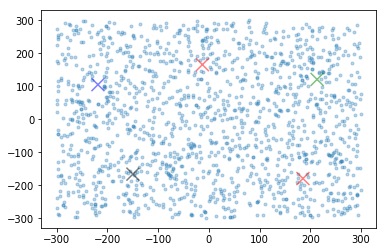

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
doKMeans(react, 5)

In [24]:
rg=(react['t3_t2_dist']>360) & (react['t3_orig_dist']>360)
react_guess=react[rg]
react_mem=react[~rg]
react_mem
react_mem['update']=react_mem['t3_t2_dist']<react_mem['t3_orig_dist']
react_guess['update']=2

react=react_mem.append(react_guess, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
react

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist,loc_quad,loc1_quad,loc2_quad,loc3_quad,update
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,27.018512,198.406149,205.448290,174.470628,165.801086,3.0,3.0,3.0,3.0,1
1,401,258,-104,250,-87,239,-78,255,-82,580,...,16.492423,278.172608,264.705497,251.406046,267.860038,4.0,4.0,4.0,4.0,1
2,401,-236,265,-237,288,-248,301,-243,298,440,...,5.830952,354.853491,372.978552,390.006410,384.516580,2.0,2.0,2.0,2.0,1
3,401,-123,200,-126,225,-116,182,-141,212,440,...,39.051248,234.795656,257.877878,215.824002,254.607541,2.0,2.0,2.0,2.0,0
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,251.962299,290.877981,256.425428,166.508258,153.687996,3.0,3.0,2.0,3.0,0
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,181.804840,246.805592,278.226526,252.017857,281.044480,3.0,3.0,3.0,3.0,0
6,401,-225,142,-186,128,-116,221,132,221,340,...,248.000000,266.062023,225.787511,249.593670,257.419890,2.0,2.0,2.0,1.0,1
7,401,133,93,176,71,241,82,240,85,320,...,3.162278,162.289864,189.781453,254.568262,254.607541,1.0,1.0,1.0,1.0,1
8,401,163,180,142,135,165,137,148,117,400,...,26.248809,242.835335,195.931110,214.462118,188.661072,1.0,1.0,1.0,1.0,1
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,15.132746,185.043238,239.075302,263.210942,266.046988,2.0,3.0,3.0,3.0,1


In [26]:
y=react['update'].map({True:1, False:0})

In [27]:
y=react['update']

In [28]:
react.dropna(axis=1, inplace=True)

In [29]:
X=react.drop(['sub', 'zero','x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 't3_orig_dist', 't3_t2_dist', 'update'], axis=1)
X.columns

Index(['t1_rt', 't2_rt', 't3_rt', 't1_order', 't2_order', 't3_order',
       't1_orig_dist', 't2_orig_dist', 't2_t1_dist', 'orig_center_dist',
       't1_center_dist', 't2_center_dist', 't3_center_dist'],
      dtype='object')

In [30]:
y_up=react['t3_t2_dist']
y_mem=react['t3_orig_dist']

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3)
forest=RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
forest.predict(X_test)
forest.score(X_test, y_test)

0.6574074074074074

In [32]:
forest.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [33]:
scores=list(zip(X.columns, forest.feature_importances_))
scores=pd.Series(data=forest.feature_importances_, index=X.columns)
scores=scores.sort_values(ascending=False)
scores

t2_t1_dist          0.176852
t3_center_dist      0.124748
t1_order            0.090084
t1_orig_dist        0.085084
orig_center_dist    0.077454
t1_rt               0.075101
t2_rt               0.072777
t2_order            0.064320
t2_orig_dist        0.062252
t2_center_dist      0.058249
t3_rt               0.048231
t1_center_dist      0.044937
t3_order            0.019912
dtype: float64

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y_mem, test_size=.3)
forest_reg=RandomForestRegressor(max_depth=3)
forest_reg.fit(X_train, y_train)
# forest_reg.predict(X_test)
forest_reg.score(X_test, y_test)

0.5062522668852021

In [35]:
scores=list(zip(X.columns, forest_reg.feature_importances_))
scores=pd.Series(data=forest_reg.feature_importances_, index=X.columns)
scores=scores.sort_values(ascending=False)
scores

t2_orig_dist        0.757265
t1_orig_dist        0.108721
t3_center_dist      0.062307
t2_t1_dist          0.036194
t1_rt               0.011711
t1_order            0.007830
orig_center_dist    0.006028
t2_order            0.005677
t3_rt               0.002660
t3_order            0.001606
t2_center_dist      0.000000
t1_center_dist      0.000000
t2_rt               0.000000
dtype: float64

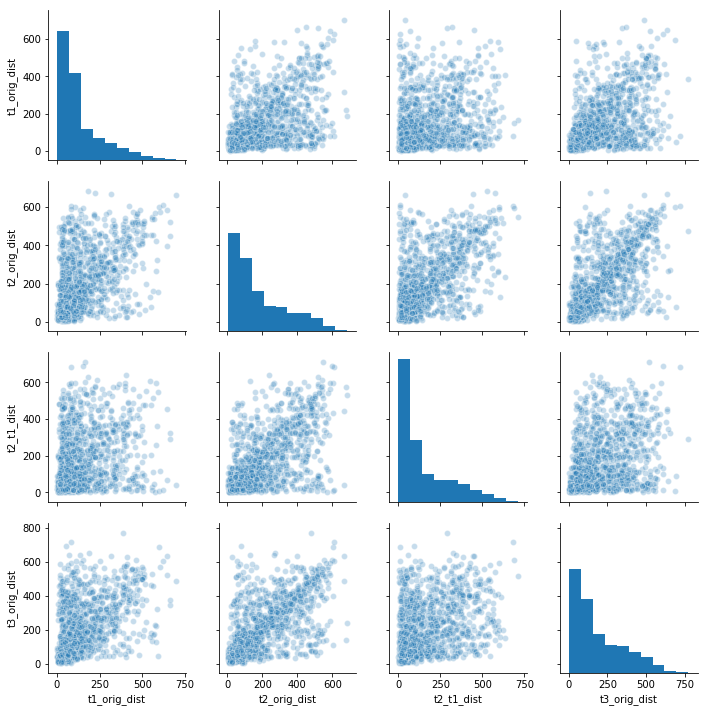

In [36]:
sns.pairplot(data=react[['t1_orig_dist', 't2_orig_dist', 't2_t1_dist', 't3_orig_dist']], plot_kws={'alpha':.25})

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y_up, test_size=.3)
forest_reg=RandomForestRegressor(max_depth=4)
forest_reg.fit(X_train, y_train)
# forest_reg.predict(X_test)
forest_reg.score(X_test, y_test)

0.21693944955498867

In [38]:
scores=list(zip(X.columns, forest_reg.feature_importances_))
scores=pd.Series(data=forest_reg.feature_importances_, index=X.columns)
scores=scores.sort_values(ascending=False)
scores

t2_t1_dist          0.439518
t2_orig_dist        0.176136
t2_rt               0.082649
t3_rt               0.071970
t1_order            0.042147
t1_orig_dist        0.038569
t1_rt               0.030575
t3_order            0.030253
t2_center_dist      0.023560
t2_order            0.020342
t1_center_dist      0.020334
t3_center_dist      0.014297
orig_center_dist    0.009649
dtype: float64

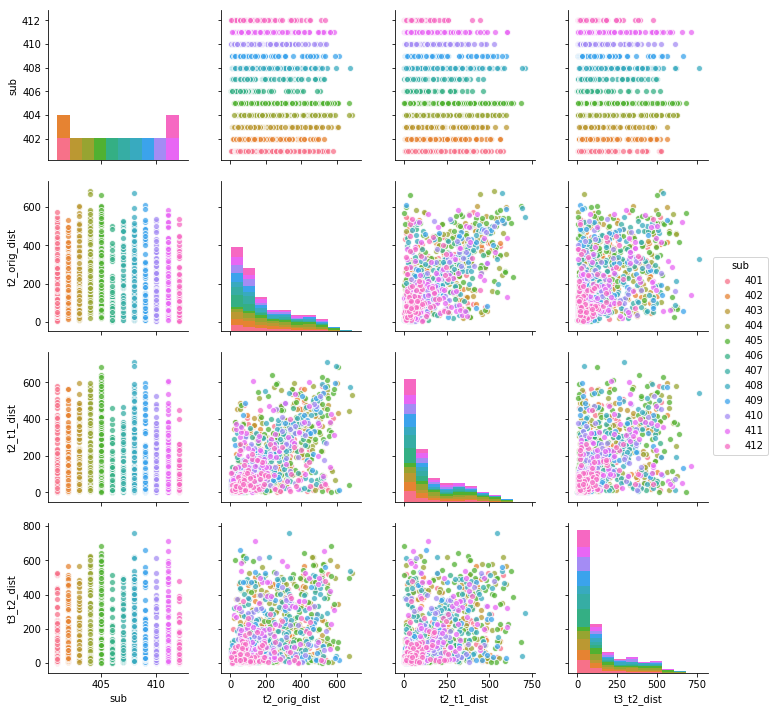

In [39]:
sns.pairplot(hue='sub', data=react[['sub', 't2_orig_dist', 't2_t1_dist', 't3_t2_dist']], plot_kws={'alpha':.75})

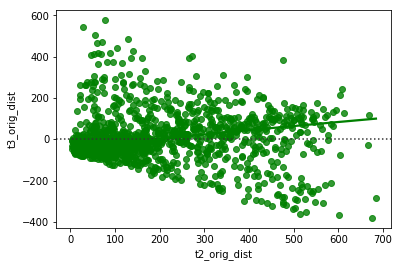

In [40]:
x=react['t2_orig_dist']
y=react['t3_orig_dist']
sns.residplot(x, y, lowess=True, color="g")

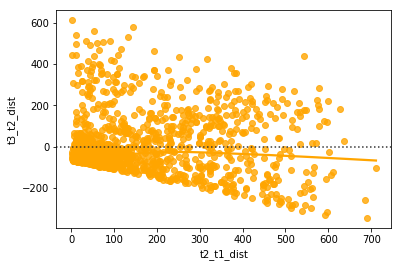

In [41]:
x=react['t2_t1_dist']
y=react['t3_t2_dist']
sns.residplot(x, y, lowess=True, color="Orange")